In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

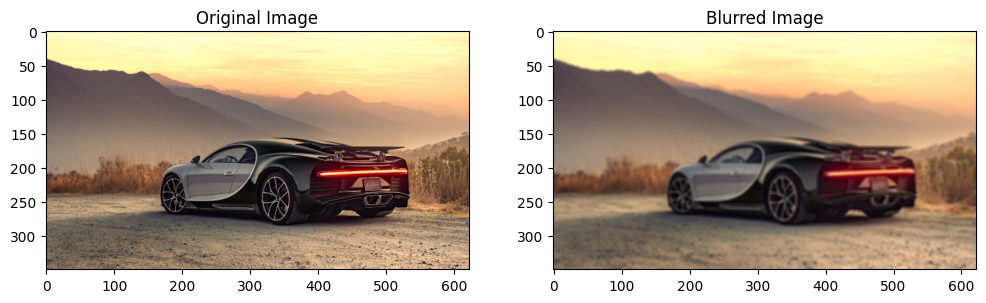

In [2]:
def averagingFilter(img):
    kernel = (5,5)
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    averagedImage = cv.blur(img,kernel)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")


    plt.subplot(1,2,2)
    plt.imshow(averagedImage)
    plt.title("Blurred Image")


averagingFilter("chiron.jpeg")

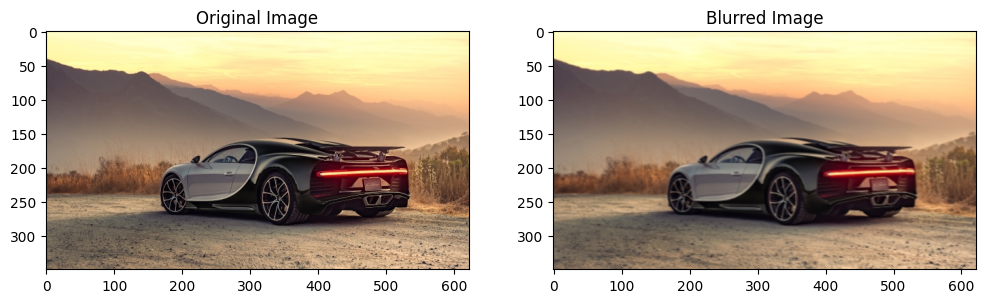

In [3]:
def weightedFilter(img,kernel):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    averagedImage = cv.filter2D(img,-1,kernel)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")


    plt.subplot(1,2,2)
    plt.imshow(averagedImage)
    plt.title("Blurred Image")

filter = np.array([[1,3,6,1],[8,9,9,7],[1,2,3,5]])
kernel = filter/(np.sum(filter))
weightedFilter("chiron.jpeg",kernel)

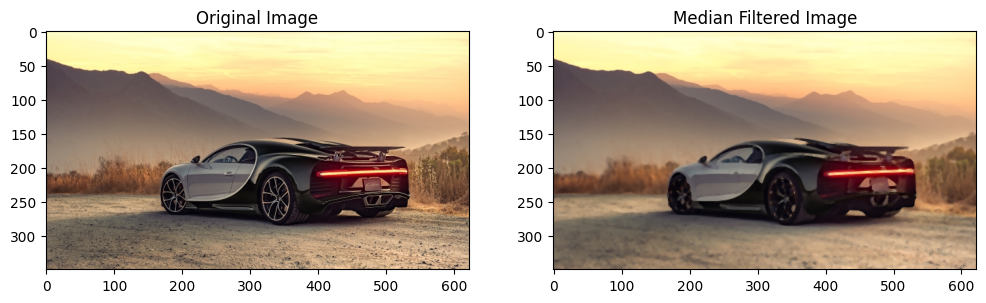

In [4]:
def medianFilter(img):
    kernel = 5
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    medianFilteredImage = cv.medianBlur(img,kernel)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(medianFilteredImage)
    plt.title("Median Filtered Image")
medianFilter("Chiron.jpeg")
    

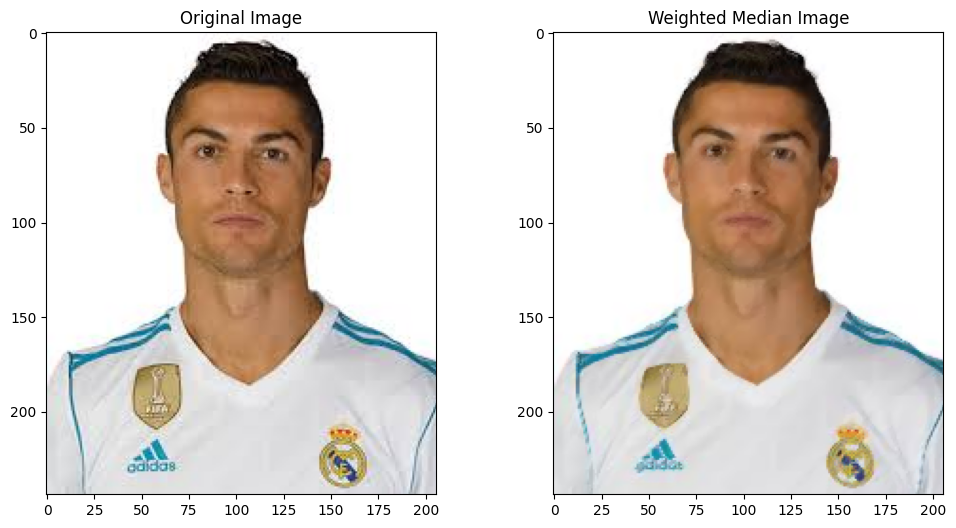

In [5]:
def weightedMedianFilter(img,kernel,weights):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    pad = kernel//2 #Adding padding on image to handle borders
    paddedImg = cv.copyMakeBorder(img,pad,pad,pad,pad,cv.BORDER_REFLECT)
    height,width,_ = img.shape
    newImg = np.zeros((height, width, 3), dtype=np.uint8)
    weights_flat = weights.flatten()
    total_weights = np.sum(weights_flat)

    for i in range(height):
        for j in range(width):
            region = paddedImg[i:i+kernel, j:j+kernel]
            region_flat = region.reshape(-1, 3)  # Flatten the region to 2D (pixels x channels)
            weighted_values = []

            for k in range(len(region_flat)):
                # Repeat each pixel value according to the corresponding weight
                pixel_value = region_flat[k]
                weight = weights.flatten()[k]
                weighted_values.extend([pixel_value] * weight)
            
            # Calculate the weighted median for each channel
            weighted_values = np.array(weighted_values)
            medians = np.median(weighted_values, axis=0)

            newImg[i, j] = medians.astype(np.uint8)


    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")


    plt.subplot(1,2,2)
    plt.imshow(newImg)
    plt.title("Weighted Median Image")

    
    

weights = np.array([[1,2,3],[2,3,0],[7,2,1]])
weightedMedianFilter("image1.jpg",weights.shape[0],weights)



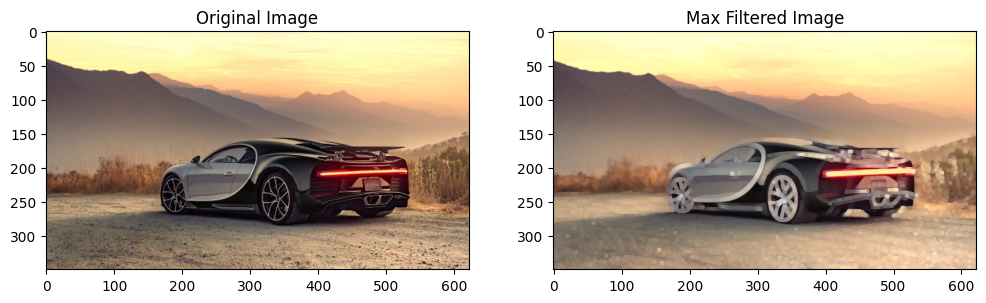

In [6]:
def maxFilter(img):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

    maxFilteredImage = cv.dilate(img,np.ones((5,5)),iterations=1)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(maxFilteredImage)
    plt.title("Max Filtered Image")
maxFilter("Chiron.jpeg")
    

    
    

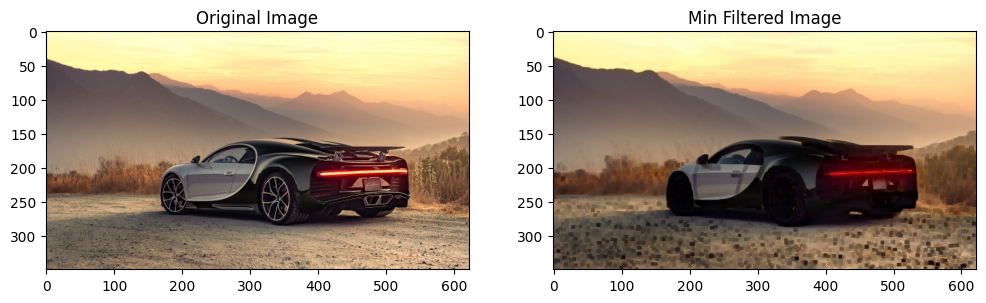

In [7]:
def minFilter(img):
    img = cv.imread(img)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

    minFilteredImage = cv.erode(img,np.ones((5,5)),iterations=1)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(minFilteredImage)
    plt.title("Min Filtered Image")
minFilter("Chiron.jpeg")